# Motor selection
Once the wheels are selected, the motors can be selected. The motors are selected based on the torque required to move the robot. Supposing the robot is moving on a slope:

<div align="center">
    <img src="https://github.com/cychitivav/pai/assets/30636259/28849f49-a775-4ba7-9728-4ea0b9911272" alt="fbd wheel" width="400"/>
</div>

Supposing that the friction is enough to keep the robot from sliding down the slope, we can get:

$$
\begin{align*}
    \Sigma M_{f} &= -r(ma) - I\alpha \\
    Wr\sin{\theta} - \tau &= -r(ma) - I\frac{a}{r} \\
    (mg)r\sin{\theta} - \tau &= -r(ma) - I\frac{a}{r}
\end{align*}
$$

where $m$ is the half of the mass of the robot (assuming that the worst case scenario is when the robot is on two wheel)

Solving for $\tau$:

$$
\tau = mr(g\sin{\theta} + a) + I\frac{a}{r}
$$


With these equations, it is possible to define the accelerations from a velocity profile. Assuming a trapezoidal velocity profile, with a cruise velocity of $v_c$ and a time to reach the cruise velocity of $t_c$, the acceleration can be calculated as:

$$
\begin{align*}
    v_c &= a\cdot t_c \\
    a &= \frac{v_c}{t_c}
\end{align*}
$$

This cruise velocity can be calculated using the mean angular velocity of comercial motors ($160\ rpm$).

$$
\begin{align*}
    \omega &= \frac{v}{r} \\
    v_c &= \omega\cdot r
\end{align*}
$$

With these equations, the torque required to move the robot can be calculated in function of the $\theta$ angle:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
wc = 160 * 2 * np.pi / 60 # rad/s
tc = 10 # s
m = 30 / 2 # kg

# Constants
r = 5 * 0.0254 # m
g = 9.81 # m/s^2
mr = 1 # kg

### Calculations

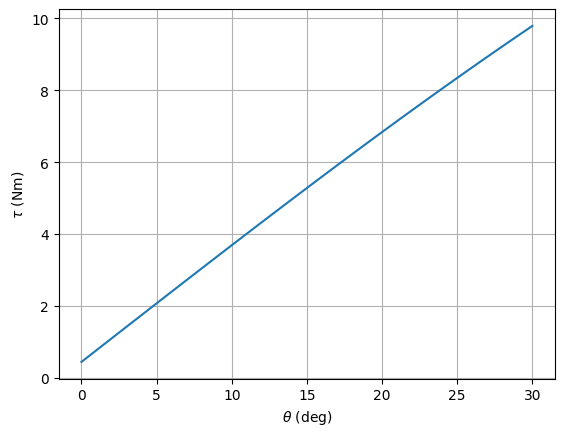

In [14]:
vc = wc * r
a = vc / tc

I = 0.5 * mr * r**2 + mr * r**2 # Parallel axis theorem
alpha = a / r

# Theta vector
theta = np.linspace(0, np.deg2rad(30), 100)

# Torque vector
tau = m * r * (g*np.sin(theta) + a) + I * alpha

# Plot
plt.plot(np.rad2deg(theta), tau)
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\tau$ (Nm)')
plt.grid()
plt.show()


## Maximum step or obstacle
The maximum step or obstacle that the robot can climb is calculated using the previous equations. Climbing a step is equivalent to climbing a slope, so the equations are the same. 

<div align="center">
    <img src="https://github.com/cychitivav/pai/assets/30636259/899c85f1-1dea-4e2d-81cc-a8c5c23c445d" alt="wheel step" width="300"/>
</div>


The maximum step is calculated using the maximum torque of the motor this value is defined using the mean torque for comercial motors ($4\ Nm$). And finally, to calculate the maximum step:

<div align="center">
    <img src="https://github.com/cychitivav/pai/assets/30636259/f53b6637-353f-4beb-96b7-da17b0a10a78" alt="wheel step" width="300"/>
</div>

$$
h = r(1-\cos{\theta}) 
$$


In [15]:
tau_max = 4 # Nm
tau = m * r * g * np.sin(theta)
theta_max = theta[np.where(tau >= tau_max)[0][0]]

print('theta = {}°, h = {} m'.format(np.rad2deg(theta_max), r*(1-np.cos(theta_max))))

theta = 12.424242424242424°, h = 0.0029741705536190086 m
